In [1]:
#import packages 
import numpy as np
import pandas as pd
from tensorflow import keras 


In [2]:
#import data 
path = 'data/'
data_1 = pd.read_csv(path + '20180821 - sitting_chewing.csv')
data_2 = pd.read_csv(path + '20180905 - walking.csv')
data_3 = pd.read_csv(path + '20180917 - 0003 - jglad - sitting.csv')
data_4 = pd.read_csv(path + '20180917 - 0001 - jglad - walking_chewing.csv')
data_5 = pd.read_csv(path + 'Walking_chewing_2.csv')
data_6 = pd.read_csv(path + '20180917 - 0004 - jglad - sitting.csv')
data_7 = pd.read_csv(path + '20180917 - 0001 - jglad - sitting.csv')
data_8 = pd.read_csv(path + '20180917 - 0004 - jglad - sitting_chewing.csv')

In [3]:
data_1 = data_1.dropna(axis=0).values
data_2 = data_2.dropna(axis=0).values
data_3 = data_3.dropna(axis=0).values
data_4 = data_4.dropna(axis=0).values
data_5 = data_5.dropna(axis=0).values
data_6 = data_6.dropna(axis=0).values
data_7 = data_7.dropna(axis=0).values
data_8 = data_8.dropna(axis=0).values

In [4]:
data_1 = np.vstack([data_1,data_8])
data_3 = np.vstack([data_3,data_6,data_7])
data_4 = np.vstack([data_4,data_5])

In [5]:
#get velocity 
vel_1 = np.diff(data_1,axis=0)
vel_2 = np.diff(data_2,axis=0)
vel_3 = np.diff(data_3,axis=0)
vel_4 = np.diff(data_4,axis=0)

In [6]:
data_1 = np.hstack([data_1[:len(data_1)-1,:],vel_1])
data_2 = np.hstack([data_2[:len(data_2)-1,:],vel_2])
data_3 = np.hstack([data_3[:len(data_3)-1,:],vel_3])
data_4 = np.hstack([data_4[:len(data_4)-1,:],vel_4])

In [7]:
data_4.shape


(45953, 8)

In [8]:
data_1 = np.hstack([data_1, np.zeros(len(data_1)).reshape(len(data_1),1)])
data_2 = np.hstack([data_2, np.ones(len(data_2)).reshape(len(data_2),1)])
data_3 = np.hstack([data_3, 2*np.ones(len(data_3)).reshape(len(data_3),1)])
data_4 = np.hstack([data_4, 3*np.ones(len(data_4)).reshape(len(data_4),1)])

In [9]:
data = np.vstack([data_1, data_2, data_3, data_4])
X = data[:,:data.shape[1] - 1]
Y = data[:,data.shape[1] - 1]

In [10]:
data_4

array([[-8.640e+02, -4.128e+03,  5.600e+02, ..., -1.280e+02, -3.480e+02,
         3.000e+00],
       [-7.520e+02, -3.808e+03,  4.320e+02, ..., -4.800e+01,  3.400e+01,
         3.000e+00],
       [-1.056e+03, -3.776e+03,  3.840e+02, ...,  2.400e+02,  9.000e+00,
         3.000e+00],
       ...,
       [-1.440e+02,  2.032e+03,  3.008e+03, ...,  0.000e+00,  1.710e+02,
         3.000e+00],
       [-1.920e+02,  2.320e+03,  3.008e+03, ...,  0.000e+00, -1.710e+02,
         3.000e+00],
       [-1.440e+02,  2.032e+03,  3.008e+03, ..., -1.600e+01,  1.630e+02,
         3.000e+00]])

In [11]:
#standard scaling
import sklearn.preprocessing as pre
X_scaled =  pre.scale(X)

In [12]:
#split into training and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X_scaled,Y,test_size=0.3,random_state=0)

In [13]:
#do one-hot encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder(sparse=False)

In [14]:
integer_encoded_train = trainY.reshape(len(trainY), 1)
onehot_encoded_train = enc.fit_transform(integer_encoded_train)

integer_encoded_test = testY.reshape(len(testY), 1)
onehot_encoded_test = enc.fit_transform(integer_encoded_test)

In [15]:
onehot_encoded_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [16]:
#set up neural network
model = keras.Sequential()


In [17]:
model.add(keras.layers.Dense(
  units = trainX.shape[1] - 1,
  input_dim = trainX.shape[1],
  activation = 'tanh'
))

model.add(keras.layers.Dense(
  units = onehot_encoded_train.shape[1],
  input_dim = trainX.shape[1],
    activation = 'softmax'    
))


In [18]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'Adam',
             metrics = ['categorical_accuracy'])

In [20]:
history = model.fit(trainX, onehot_encoded_train,
                   batch_size = 200, epochs = 20,
                   verbose = 1,
                   validation_split = 0.2)

Train on 543746 samples, validate on 135937 samples
Epoch 1/20
543746/543746 [==============================] - 3s 6us/step - loss: 0.0918 - categorical_accuracy: 0.7414 - val_loss: 0.0920 - val_categorical_accuracy: 0.7415
Epoch 2/20
543746/543746 [==============================] - 3s 6us/step - loss: 0.0919 - categorical_accuracy: 0.7417 - val_loss: 0.0919 - val_categorical_accuracy: 0.7417
Epoch 3/20
543746/543746 [==============================] - 3s 6us/step - loss: 0.0918 - categorical_accuracy: 0.7416 - val_loss: 0.0920 - val_categorical_accuracy: 0.7410
Epoch 4/20
543746/543746 [==============================] - 4s 7us/step - loss: 0.0919 - categorical_accuracy: 0.7416 - val_loss: 0.0919 - val_categorical_accuracy: 0.7417
Epoch 5/20
543746/543746 [==============================] - 4s 7us/step - loss: 0.0918 - categorical_accuracy: 0.7417 - val_loss: 0.0919 - val_categorical_accuracy: 0.7414
Epoch 6/20
543746/543746 [==============================] - 4s 8us/step - loss: 0.0918 -

In [21]:
model.evaluate(testX,onehot_encoded_test)

291293/291293 [==============================] - 3s 11us/step


[0.09172706887211551, 0.741222755094362]

In [22]:
X

array([[  752., -3920., -1424., ...,   112.,  -192.,    24.],
       [ 1024., -3808., -1616., ...,  -304.,   -32.,   300.],
       [ 1088., -4112., -1648., ...,   -48.,    48.,   -42.],
       ...,
       [ -144.,  2032.,  3008., ...,   288.,     0.,   171.],
       [ -192.,  2320.,  3008., ...,  -288.,     0.,  -171.],
       [ -144.,  2032.,  3008., ...,   272.,   -16.,   163.]])

In [23]:
#plotting the curves 
import matplotlib.pyplot as plt


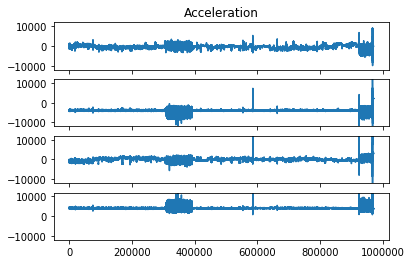

In [47]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,sharex = True, sharey = True)
ax1.plot(data[:,0])
ax1.set_ylim([-12000, 12000])
ax1.set_title('Acceleration')
ax2.plot(data[:,1])
ax3.plot(data[:,2])
ax4.plot(data[:,3])
f.savefig('Acceleration.png',dpi = 150)

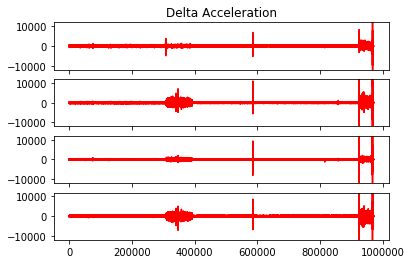

In [49]:
f, (ax4, ax5, ax6, ax7) = plt.subplots(4,sharex = True, sharey = True)

ax4.plot(data[:,4],color = 'r')
ax4.set_ylim([-12000, 12000])
ax4.set_title('Delta Acceleration')
ax5.plot(data[:,5],color = 'r')
ax6.plot(data[:,6],color = 'r')
ax7.plot(data[:,7],color = 'r')

f.savefig('Delta_Acceleration.png', dpi =150)

In [28]:
vel_1

array([[ 272,  112, -192,   24],
       [  64, -304,  -32,  300],
       [-336,  -48,   48,  -42],
       ...,
       [-272,    0,  -16,    8],
       [ -16,   32,  -32,  -34],
       [ 288,    0,   32,   -7]], dtype=int64)

In [29]:
vel_1.max()

1152

In [33]:
# saving the model 
# save model and weights
str = 'SittingChewing_Walking'
model_json = model.to_json()
with open(str + '.json', "w") as json_file:
    json_file.write(model_json)
    
model.save_weights(str + '.h5')


In [36]:
np.save('TestX_acceleration_4classes',testX)
np.save('TestY_OHC_acceleration_4classes',onehot_encoded_test)
np.save('TestY_acceleration_4classes',testY)

In [37]:
data[:,8]

array([0., 0., 0., ..., 3., 3., 3.])

In [41]:
data_1.shape, data_2.shape, data_3.shape, data_4.shape

((304745, 9), (87076, 9), (533202, 9), (45953, 9))